In [1]:
import geopandas as gpd
import descartes
import pandas as pd


In [6]:
fp = './BCN_UNITATS_ADM/0301040100_Barris_UNITATS_ADM.shp'

map_df = gpd.read_file(fp)

# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head(100)

ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT CONJ_DESCR  \
0        01   Grup - I    0104  Unitats Administratives     010413     Barris   
1        01   Grup - I    0104  Unitats Administratives     010413     Barris   
2        01   Grup - I    0104  Unitats Administratives     010413     Barris   
3        01   Grup - I    0104  Unitats Administratives     010413     Barris   
4        01   Grup - I    0104  Unitats Administratives     010413     Barris   
..      ...        ...     ...                      ...        ...        ...   
68       01   Grup - I    0104  Unitats Administratives     010413     Barris   
69       01   Grup - I    0104  Unitats Administratives     010413     Barris   
70       01   Grup - I    0104  Unitats Administratives     010413     Barris   
71       01   Grup - I    0104  Unitats Administratives     010413     Barris   
72       01   Grup - I    0104  Unitats Administratives     010413     Barris   

   ID_SUBCONJ SCONJ_DESC  ID_ELEMENT       ELEM_DESCR  ... ESTIL_ID  \
0    01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
1    01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
2    01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
3    01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
4    01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
..        ...        ...         ...              ...  ...      ...   
68   01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
69   01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
70   01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
71   01041301      Barri  0104130101  LÃ­mit de barri  ...        0   
72   01041301      Barri  0104130101  LÃ­mit de barri  ...        0   

   ESTIL_QGIS VALOR1QGIS VALOR2QGIS COL_FARCIT FCOL_DESCR FHEX_COLOR  \
0      SÃ²lid          0          0         41       NULL    #E66900   
1      SÃ²lid          0          0         41       NULL    #E66900   
2      SÃ²lid          0          0         41       NULL    #E66900   
3      SÃ²lid          0          0         41       NULL    #E66900   
4      SÃ²lid          0          0         41       NULL    #E66900   
..        ...        ...        ...        ...        ...        ...   
68     SÃ²lid          0          0         41       NULL    #E66900   
69     SÃ²lid          0          0         41       NULL    #E66900   
70     SÃ²lid          0          0         41       NULL    #E66900   
71     SÃ²lid          0          0         41       NULL    #E66900   
72     SÃ²lid          0          0         41       NULL    #E66900   

   COL_DESCR HEX_COLOR7                                           geometry  
0       NULL    #73A88F  POLYGON ((430162.188 4581936.985, 430550.104 4...  
1       NULL    #73A88F  POLYGON ((431189.907 4581851.447, 431332.429 4...  
2       NULL    #73A88F  POLYGON ((432798.734 4582081.260, 432805.852 4...  
3       NULL    #73A88F  POLYGON ((430697.039 4583695.771, 430804.422 4...  
4       NULL    #73A88F  POLYGON ((429554.907 4582761.816, 429647.231 4...  
..       ...        ...                                                ...  
68      NULL    #73A88F  POLYGON ((431773.444 4589345.000, 431770.923 4...  
69      NULL    #73A88F  POLYGON ((432241.072 4589590.897, 432245.660 4...  
70      NULL    #73A88F  POLYGON ((431633.963 4590307.057, 431663.317 4...  
71      NULL    #73A88F  POLYGON ((431488.230 4590598.466, 431519.989 4...  
72      NULL    #73A88F  POLYGON ((431866.316 4591065.930, 431874.995 4...  

[73 rows x 47 columns]

In [3]:


df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [40.387739, 41.387739, 43.387739, 41.387739, 41.1387739],
     'Longitude': [2.151873, 2.011873, 2.151873, 2.251873, 2.151873]})
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

df.head()


#geometry = gpd.points_from_xy(p1, p2)

City    Country   Latitude  Longitude                  geometry
0  Buenos Aires  Argentina  40.387739   2.151873  POINT (2.15187 40.38774)
1      Brasilia     Brazil  41.387739   2.011873  POINT (2.01187 41.38774)
2      Santiago      Chile  43.387739   2.151873  POINT (2.15187 43.38774)
3        Bogota   Colombia  41.387739   2.251873  POINT (2.25187 41.38774)
4       Caracas  Venezuela  41.138774   2.151873  POINT (2.15187 41.13877)

In [4]:
#hg.crs = {'init' :'epsg:4326'}  
# ^ comment out to get a "Cannot transform naive geometries" error below

# project to merkator
#hg.to_crs({'init': 'epsg:3395'})


gdf.crs = {'init' :'epsg:4326'}  
projected = gdf.to_crs({'init':'epsg=3857'})

#map_df=map_df.to_crs(epsg=5000)
import contextily as ctx
ax = projected.plot(figsize=(20, 20), alpha=0.5)
ctx.add_basemap(ax)

/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


CRSError: Invalid projection: +init=epsg=3857 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=epsg=3857 +type=crs)

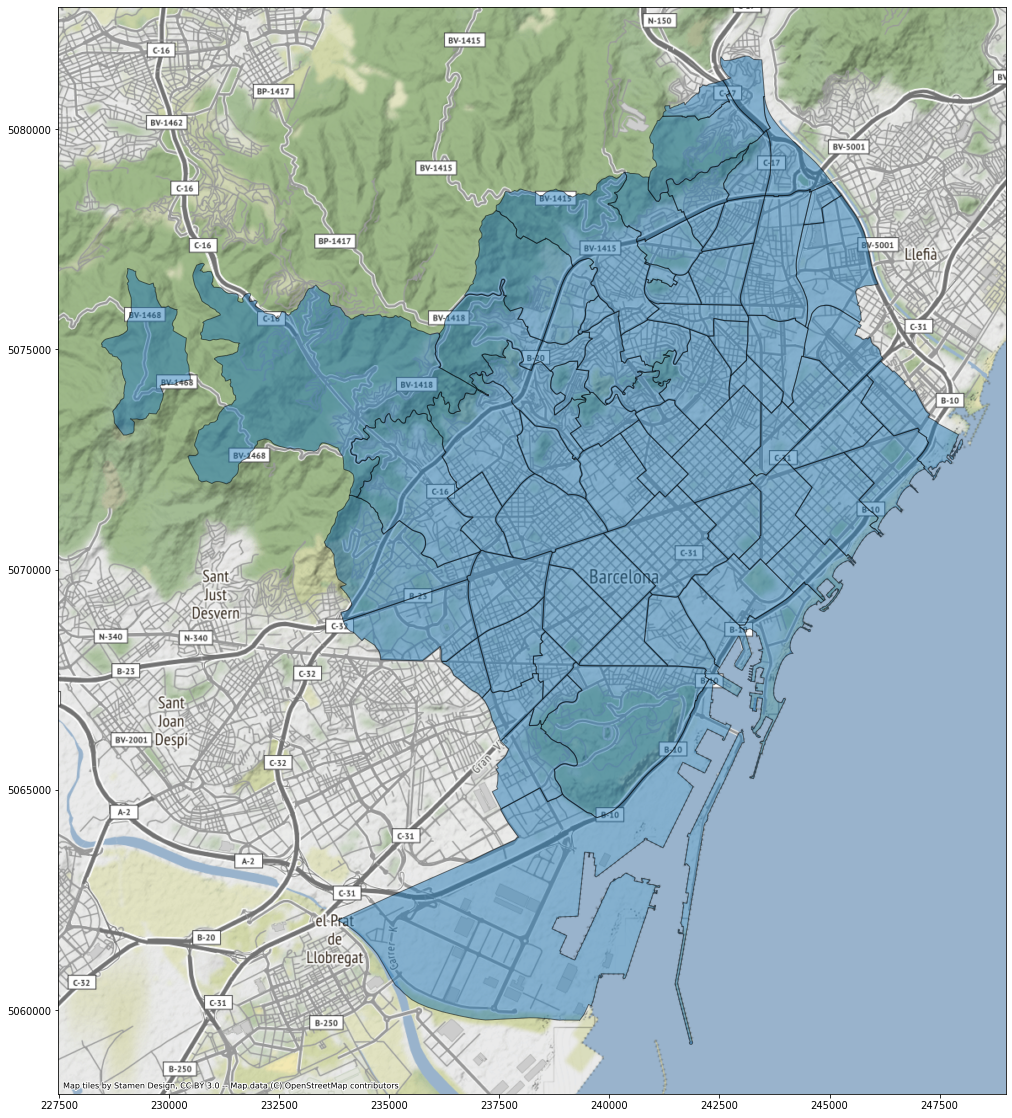

In [5]:
#map_df.plot(figsize=(15,15))




map_df = map_df.to_crs(epsg=3857)
#map_df=map_df.to_crs(epsg=5000)
import contextily as ctx
ax = map_df.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

Plot a 1 km circle from specific coordinate

In [6]:
map_df.head()

ID_ANNEX ANNEXDESCR ID_TEMA               TEMA_DESCR ID_CONJUNT CONJ_DESCR  \
0       01   Grup - I    0104  Unitats Administratives     010413     Barris   
1       01   Grup - I    0104  Unitats Administratives     010413     Barris   
2       01   Grup - I    0104  Unitats Administratives     010413     Barris   
3       01   Grup - I    0104  Unitats Administratives     010413     Barris   
4       01   Grup - I    0104  Unitats Administratives     010413     Barris   

  ID_SUBCONJ SCONJ_DESC  ID_ELEMENT       ELEM_DESCR  ... ESTIL_ID ESTIL_QGIS  \
0   01041301      Barri  0104130101  LÃ­mit de barri  ...        0     SÃ²lid   
1   01041301      Barri  0104130101  LÃ­mit de barri  ...        0     SÃ²lid   
2   01041301      Barri  0104130101  LÃ­mit de barri  ...        0     SÃ²lid   
3   01041301      Barri  0104130101  LÃ­mit de barri  ...        0     SÃ²lid   
4   01041301      Barri  0104130101  LÃ­mit de barri  ...        0     SÃ²lid   

  VALOR1QGIS VALOR2QGIS COL_FARCIT FCOL_DESCR FHEX_COLOR COL_DESCR HEX_COLOR7  \
0          0          0         41       NULL    #E66900      NULL    #73A88F   
1          0          0         41       NULL    #E66900      NULL    #73A88F   
2          0          0         41       NULL    #E66900      NULL    #73A88F   
3          0          0         41       NULL    #E66900      NULL    #73A88F   
4          0          0         41       NULL    #E66900      NULL    #73A88F   

                                            geometry  
0  POLYGON ((240974.836 5069434.022, 241491.866 5...  
1  POLYGON ((242344.111 5069332.857, 242535.664 5...  
2  POLYGON ((244483.074 5069660.147, 244492.552 5...  
3  POLYGON ((241664.473 5071791.505, 241808.874 5...  
4  POLYGON ((240155.695 5070528.478, 240279.853 5...  

[5 rows x 47 columns]

# Krug od 1 km, radi, ali je krug na kraju premali...

In [7]:
# x,y = 41.376879, 2.127111

df = pd.DataFrame(
    {'Location': ['Home'],
     'Latitude': [41.37687],
     'Longitude': [2.127111]})

gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

# projection
gdf.crs = {'init' :'epsg:4326'}
gdf= gdf.to_crs(epsg=3857)

# create circle with radius 1km
gdf['Radius'] = gdf.buffer(1350)

# set new "geometry" as Radius
gdf = gdf.set_geometry('Radius')
print ("New gemetry name is: " + gdf.geometry.name)

gdf.area

New gemetry name is: Radius


/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


0    5.716360e+06
dtype: float64

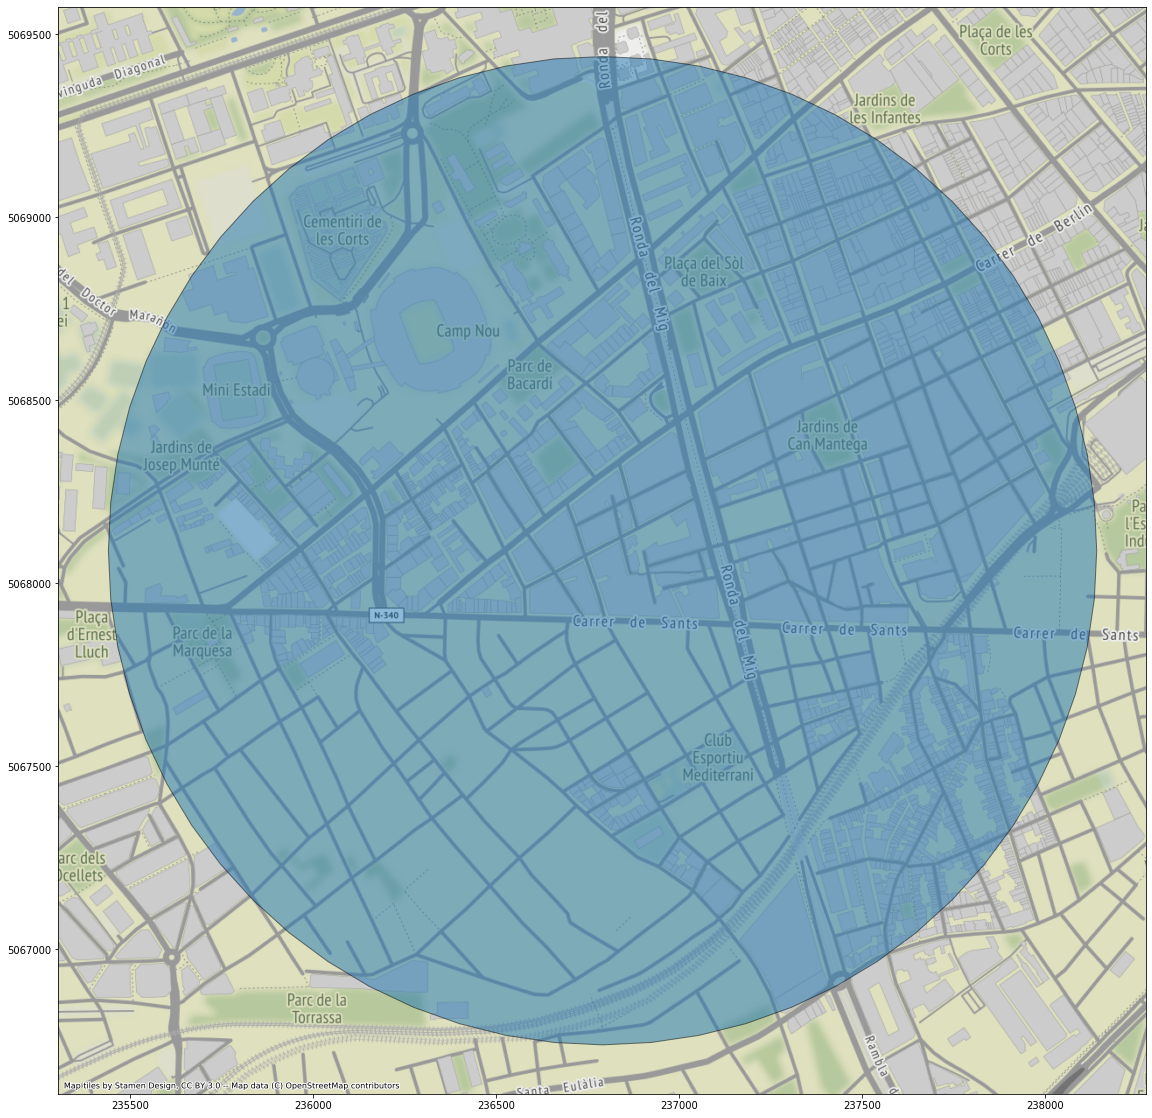

In [8]:
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

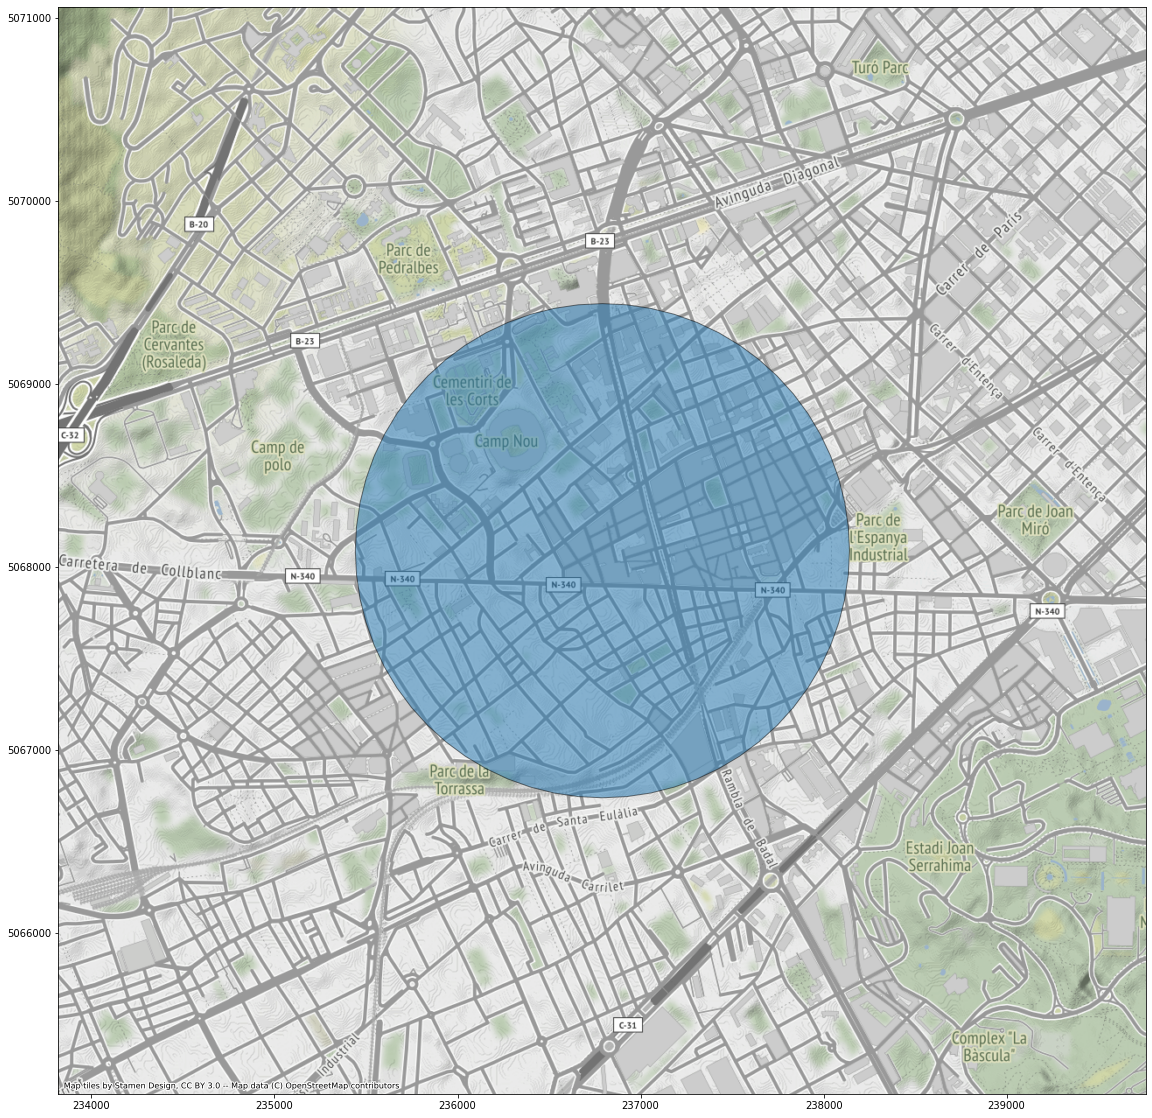

In [14]:
def increase_range(ax, r):
    x = ax.get_xlim()
    m = (x[0]+x[1])/2
    ax.set_xlim(m-(m-x[0])*r, m+(x[1]-m)*r)
    
    y = ax.get_ylim()
    m = (y[0]+y[1])/2
    ax.set_ylim(m-(m-y[0])*r, m+(y[1]-m)*r)
    

    
def add_basemap(ax, zoom=10, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))
    
    
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
increase_range(ax, 2)
#add_basemap(ax, zoom=14)
ctx.add_basemap(ax)

# Radi dobro

In [10]:
from functools import partial
import pyproj
from shapely.ops import transform
from shapely.geometry import Point
from shapely.geometry import Polygon

proj_wgs84 = pyproj.Proj(init='epsg:4326')


def geodesic_point_buffer(lat, lon, km):
    # Azimuthal equidistant projection
    aeqd_proj = '+proj=aeqd +lat_0={lat} +lon_0={lon} +x_0=0 +y_0=0'
    project = partial(
        pyproj.transform,
        pyproj.Proj(aeqd_proj.format(lat=lat, lon=lon)),
        proj_wgs84)
    buf = Point(0, 0).buffer(km * 1000)  # distance in metres
    return transform(project, buf).exterior.coords[:]

# My address
pol = geodesic_point_buffer(41.376879, 2.127111, 1.0)

polygon = gpd.GeoDataFrame(index=[0], geometry=[Polygon(pol)])     
polygon.crs = {'init' :'epsg:4326'}
polygon= polygon.to_crs(epsg=3857)



/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/home/titomir/miniconda3/envs/Data/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the pr

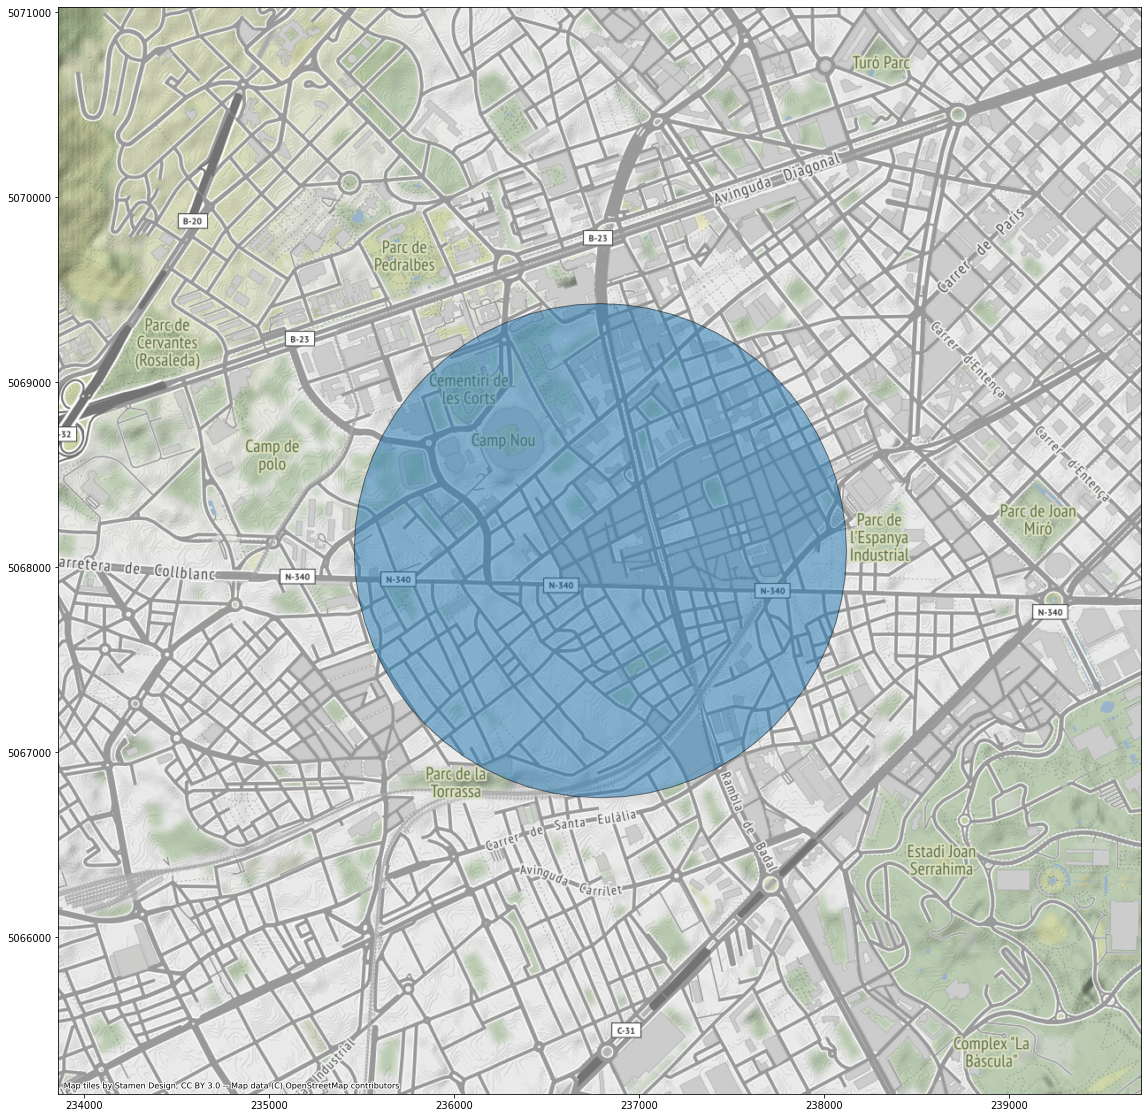

In [11]:
def increase_range(ax, r):
    x = ax.get_xlim()
    m = (x[0]+x[1])/2
    ax.set_xlim(m-(m-x[0])*r, m+(x[1]-m)*r)
    
    y = ax.get_ylim()
    m = (y[0]+y[1])/2
    ax.set_ylim(m-(m-y[0])*r, m+(y[1]-m)*r)
    
ax = polygon.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
increase_range(ax,2)
ctx.add_basemap(ax)
